In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# 1.First Table Customer demographic 

In [278]:
df1 = pd.read_excel("customerdemographic.xlsx")

In [279]:
df1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [280]:
df1.shape

(4000, 13)

In [281]:
print(df1.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [282]:
df1.duplicated().nunique()
#which means there is no duplicate rows

1

In [283]:
df1.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

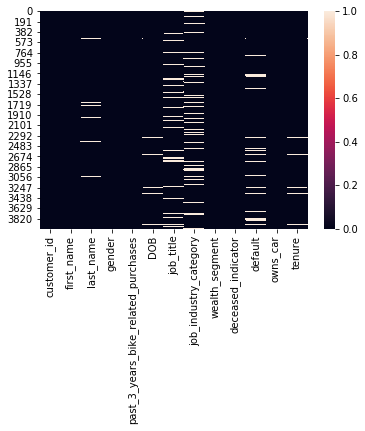

In [284]:
sns.heatmap(df1.isnull())

## Now working on all the columns one by one 

## a. Customer id

In [285]:
#checking number of unique values in  the column
df1["customer_id"].nunique()
#Its similar to no of rows which means we have all the unique values for the customer id 

4000

## b. first name 

In [286]:
#We do not have any null value in the first name column 
df1["first_name"].nunique()
#hence we see there are common name in the column and also last name is missing in some of the cases we need to look at that also 

3139

## c. Last Name 

In [287]:
df1[df1["last_name"].isnull()].nunique()
#this shows we have 2 group of two people each with the same first name and no last name

customer_id                            125
first_name                             123
last_name                                0
gender                                   3
past_3_years_bike_related_purchases     71
DOB                                    120
job_title                               77
job_industry_category                    9
wealth_segment                           3
deceased_indicator                       1
default                                 64
owns_car                                 2
tenure                                  22
dtype: int64

In [288]:
def givevalue(lastname):
    if pd.isnull(lastname):
        return "Anonymous"
    else :
        return lastname 
df1["last_name"]=df1["last_name"].apply(givevalue)

In [289]:
df1[df1["last_name"]=="Anonymous"]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
3,4,Talbot,Anonymous,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
66,67,Vernon,Anonymous,Male,67,1960-06-14,Web Developer II,Retail,Mass Customer,N,<svg><script>0<1>alert('XSS')</script>,No,18.0
105,106,Glyn,Anonymous,Male,54,1966-07-03,Software Test Engineer III,Health,High Net Worth,N,ãã¼ãã£ã¼ã¸è¡ããªãã,Yes,18.0
138,139,Gar,Anonymous,Male,1,1964-07-28,Operator,Telecommunications,Affluent Customer,N,-100,No,4.0
196,197,Avis,Anonymous,Female,32,1977-01-27,NaN,NaN,High Net Worth,N,NaN,No,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3884,3885,Asher,Anonymous,Male,55,1978-06-17,Actuary,Financial Services,Mass Customer,N,"×Ö¼Ö°×¨Öµ××©×Ö´××ª, ×Ö¼Ö¸×¨Ö¸× ×Ö±×Ö¹×Ö´××, ×Ö...",Yes,8.0
3915,3916,Myrtia,Anonymous,Female,31,1958-10-17,NaN,Retail,Affluent Customer,N,"Ø«Ù ÙÙØ³ Ø³ÙØ·Øª ÙØ¨Ø§ÙØªØ­Ø¯ÙØ¯Ø, Ø¬Ø²ÙØ±ØªÙ ...",Yes,17.0
3926,3927,Conway,Anonymous,Male,29,1978-01-07,Electrical Engineer,Manufacturing,Mass Customer,N,Ã¥ÃâÆÂ©ËâËÂ¬â¦Ã¦,Yes,7.0
3961,3962,Benoit,Anonymous,Male,17,1977-10-06,Project Manager,Argiculture,High Net Worth,N,",ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ",Yes,14.0


In [290]:
a=df1[df1["last_name"]=="Anonymous"]

In [291]:
a[a["first_name"].duplicated()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1350,1351,Lorettalorna,Anonymous,U,32,NaT,Office Assistant IV,IT,High Net Worth,N,NaN,No,NaN
1904,1905,Corabelle,Anonymous,Female,21,1953-09-17,Help Desk Technician,Manufacturing,Affluent Customer,N,00ËÆ$-,No,15.0


In [292]:
a[a["first_name"]=="Corabelle"]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
937,938,Corabelle,Anonymous,Female,18,1996-04-06,Technical Writer,Retail,Mass Customer,N,Î©âÃ§ââ«ËÂµâ¤â¥Ã·,No,7.0
1904,1905,Corabelle,Anonymous,Female,21,1953-09-17,Help Desk Technician,Manufacturing,Affluent Customer,N,00ËÆ$-,No,15.0


In [293]:
a[a["first_name"]=="Lorettalorna"]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1089,1090,Lorettalorna,Anonymous,Female,15,1975-07-15,Computer Systems Analyst II,Telecommunications,Affluent Customer,N,1000000000000000049861653971908893017010268485...,No,17.0
1350,1351,Lorettalorna,Anonymous,U,32,NaT,Office Assistant IV,IT,High Net Worth,N,NaN,No,NaN


In [294]:
#so index 937 and 1904 have same firstname and lastname  and index 1089 and 1350 have same firstname and lastname 

## d.Gender 

In [295]:
df1["gender"].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [296]:
#so we will convert values as "F" "M" and "U" only 
def changeval(gender):
    if (gender=="Male") :
        return "M"
    elif (gender == "Female") or (gender == "Femal") :
        return "F"
    else :
        return gender

df1["gender"]=df1["gender"].apply(changeval)

In [297]:
df1.gender.unique()

array(['F', 'M', 'U'], dtype=object)

## e.past_3_years_bike_related_purchases

In [298]:
#this column seems fine

## f. DOB

In [299]:
#its observed that wherever the gender is U we dont have DOB so we will be putting the average DOB of the entire dataset 
df1[df1["DOB"].isnull()].head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
143,144,Jory,Barrabeale,U,71,NaT,Environmental Tech,IT,Mass Customer,N,NaN,No,NaN
167,168,Reggie,Broggetti,U,8,NaT,General Manager,IT,Affluent Customer,N,NaN,Yes,NaN
266,267,Edgar,Buckler,U,53,NaT,NaN,IT,High Net Worth,N,NaN,No,NaN
289,290,Giorgio,Kevane,U,42,NaT,Senior Sales Associate,IT,Mass Customer,N,NaN,No,NaN
450,451,Marlow,Flowerdew,U,37,NaT,Quality Control Specialist,IT,High Net Worth,N,NaN,No,NaN


In [300]:
from statistics import mean
mean((pd.DatetimeIndex(df1['DOB']).year).dropna())

1977.0306670074112

In [301]:
def changedob(value):
    if pd.isnull(value):
        return pd.Timestamp(1977, 1, 1, 12)
    else :
        return value
df1["DOB"]=df1["DOB"].apply(changedob)

## g.Job_title

In [302]:
#we caanot aggign jobs directly so we will fill jobs as unknown for those whoc=ose value is not known
def job(val):
    if pd.isnull(val):
        return "Unknown"
    else :
        return val
df1["job_title"]=df1["job_title"].apply(job)

## h. job_industry_category

In [303]:
joblist=list(df1["job_industry_category"].unique())

In [304]:
dic=dict()
for value in joblist:
    dic[value]=df1[df1["job_industry_category"]==value]["job_title"]

In [305]:
for i in joblist:
    print(len(dic[i]))

602
774
267
223
0
358
113
799
72
136


In [353]:
flag=df1.groupby(["job_title","job_industry_category",]).count()
flag.head()

customer_id  first_name  last_name  \
job_title           job_industry_category                                       
Account Coordinator Argiculture                      1           1          1   
                    Entertainment                    1           1          1   
                    Financial Services               2           2          2   
                    Health                           3           3          3   
                    IT                               2           2          2   

                                           gender  \
job_title           job_industry_category           
Account Coordinator Argiculture                 1   
                    Entertainment               1   
                    Financial Services          2   
                    Health                      3   
                    IT                          2   

                                           past_3_years_bike_related_purchases  \
job_title           job_industry_category                                        
Account Coordinator Argiculture                                              1   
                    Entertainment                                            1   
                    Financial Services                                       2   
                    Health                                                   3   
                    IT                                                       2   

                                           DOB  wealth_segment  \
job_title           job_industry_category                        
Account Coordinator Argiculture              1               1   
                    Entertainment            1               1   
                    Financial Services       2               2   
                    Health                   3               3   
                    IT                       2               2   

                                           deceased_indicator  owns_car  \
job_title           job_industry_category                                 
Account Coordinator Argiculture                             1         1   
                    Entertainment                           1         1   
                    Financial Services                      2         2   
                    Health                                  3         3   
                    IT                                      2         2   

                                           tenure  
job_title           job_industry_category          
Account Coordinator Argiculture                 1  
                    Entertainment               1  
                    Financial Services          2  
                    Health                      3  
                    IT                          2

In [354]:
flag.reset_index(inplace=True)


In [356]:
flag=flag.groupby(["job_title"]).max()
flag.head()

,job_industry_category,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,wealth_segment,deceased_indicator,owns_car,tenure
job_title,,,,,,,,,,,
Account Coordinator,Retail,8,8,8,8,8,8,8,8,8,8
Account Executive,Retail,10,10,10,10,10,10,10,10,10,10
Account Representative I,Retail,2,2,2,2,2,2,2,2,2,2
Account Representative II,Health,2,2,2,2,2,2,2,2,2,2
Account Representative III,Property,2,2,2,2,2,2,2,2,2,2


In [359]:
def fillvalue(value):
    job=value[0]
    cate=value[1]
    if pd.isnull(cate):
        return flag.at[job,"job_industry_category"]
    else :
        return cate
df1["job_industry_category"]=df1[["job_title","job_industry_category"]].apply(fillvalue,axis=1)

In [306]:
df1.nunique()

customer_id                            4000
first_name                             3139
last_name                              3726
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                    3449
job_title                               196
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

## i.wealth_segment

In [307]:
df1["wealth_segment"].unique()
#this column seems good

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

## j.deceased indicator 

In [308]:
#this column seems fine 
df1["deceased_indicator"].unique()

array(['N', 'Y'], dtype=object)

## k.default 

In [309]:
df1["default"]

0                                                      "'
1                            <script>alert('hi')</script>
2                                     2018-02-01 00:00:00
3       () { _; } >_[$($())] { touch /tmp/blns.shellsh...
4                                                     NIL
                              ...                        
3995                                                 -100
3996                                             â¦testâ§
3997                                                  NaN
3998                               Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ 
3999                                                  0/0
Name: default, Length: 4000, dtype: object

In [310]:
#this column seems useless so we are going to drop it 
df1.drop(["default"],inplace=True,axis=1)

In [311]:
df1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,Anonymous,M,33,1961-10-03,Unknown,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


## l. owns car 

In [312]:
df1["owns_car"].unique()
#this column seems fine

array(['Yes', 'No'], dtype=object)

## m.tenure

In [313]:
sam=df1.groupby(["job_industry_category","job_title"]).mean()

In [314]:
print(sam.index)

MultiIndex([(       'Argiculture',          'Account Coordinator'),
            (       'Argiculture',            'Account Executive'),
            (       'Argiculture',    'Account Representative IV'),
            (       'Argiculture',   'Administrative Assistant I'),
            (       'Argiculture', 'Administrative Assistant III'),
            (       'Argiculture',  'Administrative Assistant IV'),
            (       'Argiculture',       'Administrative Officer'),
            (       'Argiculture',            'Assistant Manager'),
            (       'Argiculture',          'Assistant Professor'),
            (       'Argiculture',          'Associate Professor'),
            ...
            ('Telecommunications',              'Staff Scientist'),
            ('Telecommunications',          'Structural Engineer'),
            ('Telecommunications',    'Systems Administrator III'),
            ('Telecommunications',               'Tax Accountant'),
            ('Telecommunications

In [332]:
sam.at[('IT','Account Coordinator'),"tenure"]


15.0

In [338]:
#fill the average tenure according to job title and job industry category
def fillten(value):
    cat=value[0]
    job=value[1]
    ten=value[2]
    if pd.isnull(ten) :
        val=sam.at[(cat,job),"tenure"]
        if pd.isnull(val):
            return 0
        else :
            return val
    else :
        return ten
df1["tenure"]= df1[["job_industry_category","job_title","tenure"]].apply(fillten,axis=1)

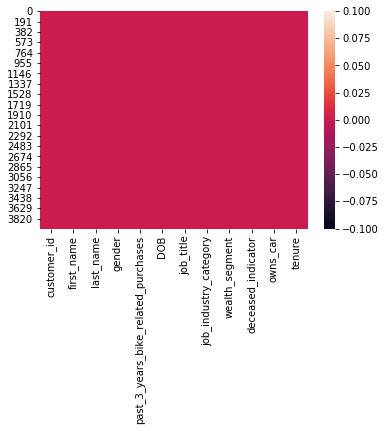

In [361]:
 sns.heatmap(df1.isnull())

# Table 2 Customer address 

In [386]:
df2=pd.read_excel("customeraddress.xlsx")

In [376]:
'''
for i in range(df2.shape[0]):
    df2["customer_id"][i]=i+1
'''

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [387]:
df2.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


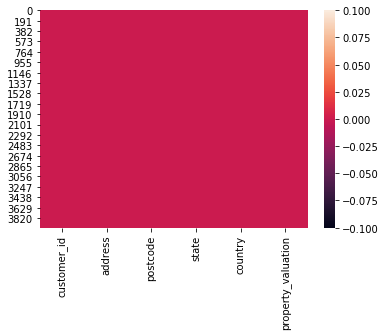

In [388]:
sns.heatmap(df2.isnull())

In [389]:
#this file is perfectly fine
#now we will join the table one and table two 

In [390]:
people=pd.merge(df1,df2,on="customer_id")

In [391]:
people.shape

(3996, 17)

# 3.Table Three--"Transaction"

In [430]:
trans=pd.read_excel("transaction.xlsx")

In [431]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


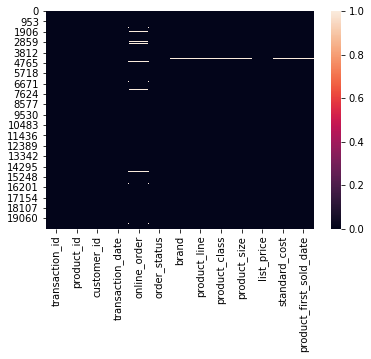

In [432]:
sns.heatmap(trans.isnull())

In [433]:
a=list(trans[trans["standard_cost"].isnull()].index)

In [434]:
#dropping few row which have all the missing values
trans.drop(a,inplace=True)

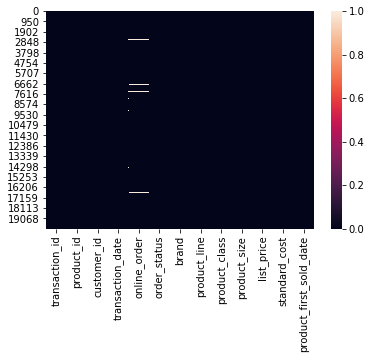

In [435]:
sns.heatmap(trans.isnull())

In [436]:
trans[trans["online_order"].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823.0
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,37838.0
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,42145.0
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,35455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,41345.0
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,41064.0
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,38002.0


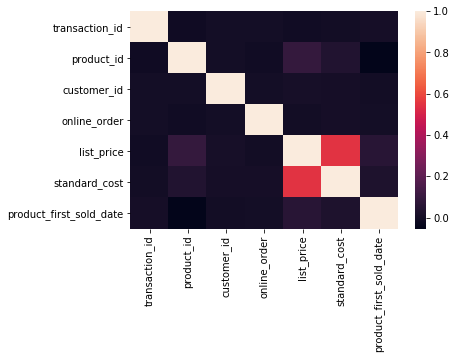

In [437]:
sns.heatmap(trans.corr())

In [438]:
#since there is no strong correlation between online ordes and any other column so we have to drop those column with NaN values
a=list(trans[trans["online_order"].isnull()].index)

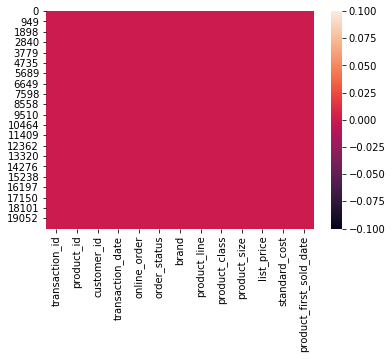

In [439]:
trans.drop(a,inplace=True)
sns.heatmap(trans.isnull())

### Now we don't have any missing values in the tables of both transition and customer details .Now we are ready for analysing the data

In [429]:
#converting the dataframes back to excel file
people.to_excel("customerdetails_clean.xlsx")

In [440]:
trans.to_excel("transactiondetails_clean.xlsx")